In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/parkinsons.csv

--2022-04-16 10:35:54--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/parkinsons.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.14
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38273 (37K) [text/csv]
Saving to: ‘parkinsons.csv’

parkinsons.csv      100%[===================>]  37.38K  --.-KB/s    in 0.08s   

2022-04-16 10:35:54 (464 KB/s) - ‘parkinsons.csv’ saved [38273/38273]



In [ ]:
df = pd.read_csv('parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

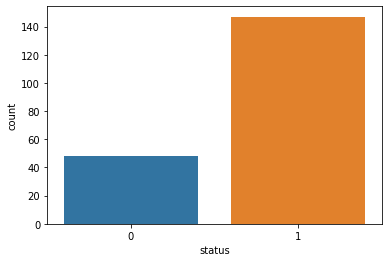

In [ ]:
#Check labeled values distrbuition
sns.countplot(df['status'])
plt.show()

In [ ]:
#Find length of positive cases
len(df.loc[df['status'] == 1])

147

In [ ]:
len(df.loc[df['status'] == 0])

48

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: status, dtype: float64


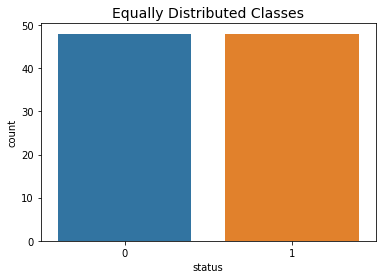

In [ ]:
#Under sampling the data so we can get a balanced dataset
df = df.sample(frac=1)

positive_df = df.loc[df['status'] == 1][0:48]
negative_df = df.loc[df['status'] == 0]

normal_distrbuted_df = pd.concat([positive_df, negative_df])

new_df = normal_distrbuted_df.sample(frac = 1, random_state = 22)

new_df.head()

print('Distribution of the Classes in the subsample dataset')
print(new_df['status'].value_counts()/len(new_df))



sns.countplot('status', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

1 = parkinson's positive

0 = parkinson's negative

In [ ]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


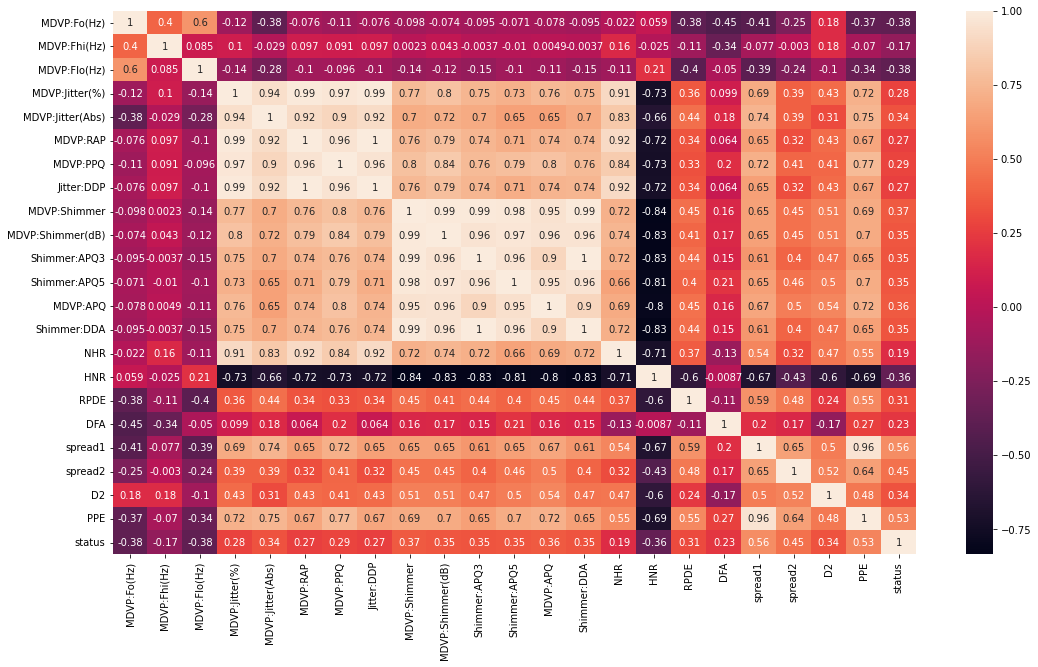

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.pairplot(df,hue='status');

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# separating the data and label
X_ = df.drop(columns=['status', 'name'],axis=1)
y = df['status']

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
X = standardized_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])  #l f1 score è la media armonica tra precision e recall
    
    # Add 'Best Score' column
    #models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table.T)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.857368,0.885469,0.932857,0.907834
Support Vector Classifier,0.872895,0.905469,0.932381,0.917169
Decision Tree,0.892105,0.929485,0.930952,0.927863
Random Forest,0.907895,0.918971,0.966190,0.940993
Gaussian Naive Bayes,0.697632,0.963974,0.626667,0.749238


>1, train: 0.853, test: 0.821
>2, train: 0.891, test: 0.795
>3, train: 0.929, test: 0.872
>4, train: 0.968, test: 0.897
>5, train: 0.987, test: 0.923
>6, train: 1.000, test: 0.923
>7, train: 1.000, test: 0.923
>8, train: 1.000, test: 0.923
>9, train: 1.000, test: 0.923


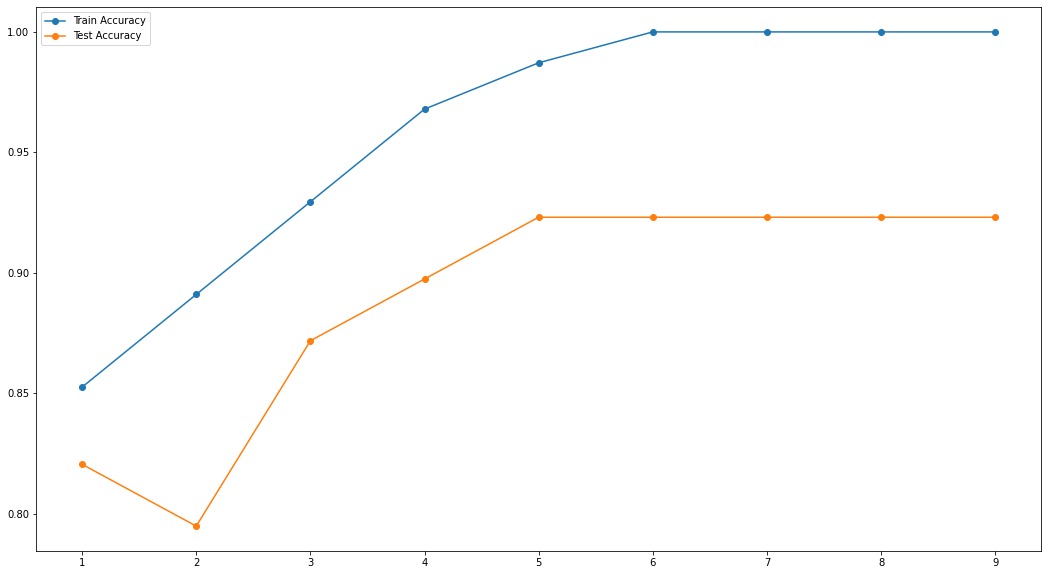

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 10)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=667)

Text(0.5, 0, 'Relative Importance')

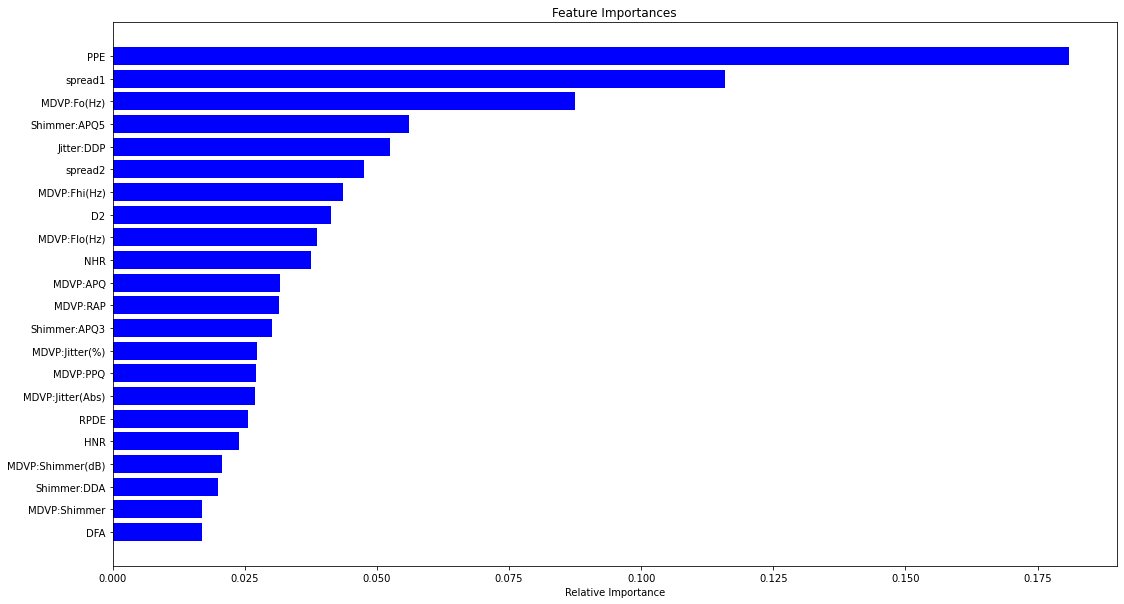

In [ ]:
#Feature importance for Random Forest
features = X_.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9230769230769231


In [ ]:
labels = ['No parkinson', 'Parkinson']

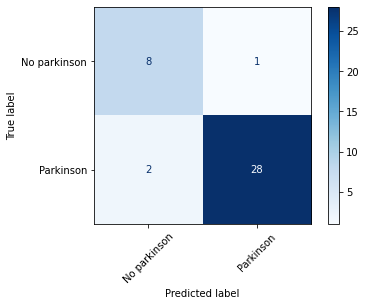

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

No parkinson       0.80      0.89      0.84         9
   Parkinson       0.97      0.93      0.95        30

    accuracy                           0.92        39
   macro avg       0.88      0.91      0.90        39
weighted avg       0.93      0.92      0.92        39



In [ ]:
!pip install plot-metric --quiet

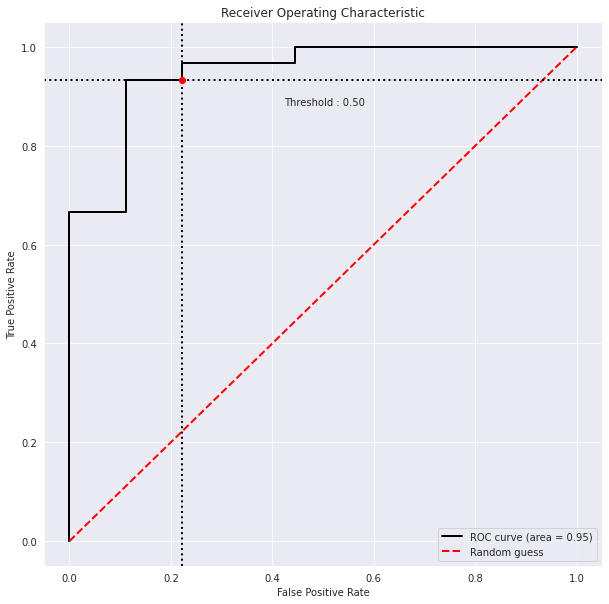

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['heart attack', 'no heart attack']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.9481481481481482

In [ ]:
#the following input data are from a patient with Parkinson
input_data = [119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No parkinson')
else:
  print('Parkinson')

[[-0.82929965 -0.43616456 -0.95203729  0.33491386  0.74975946  0.13296255
   0.76080023  0.13175532  0.74598495  0.73953578  0.60785907  1.11914677
   0.33298451  0.60753214 -0.06789281 -0.19322537 -0.8078385   1.76081412
   0.80132308  0.48047686 -0.21053082  0.86888575]]
1
Parkinson


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))


feature selected 2, Acc.Test: 0.872, AUC: 0.956
feature selected 3, Acc.Test: 0.923, AUC: 0.944
feature selected 4, Acc.Test: 0.923, AUC: 0.948
feature selected 5, Acc.Test: 0.923, AUC: 0.944
feature selected 6, Acc.Test: 0.923, AUC: 0.941
feature selected 7, Acc.Test: 0.949, AUC: 0.944
feature selected 8, Acc.Test: 0.949, AUC: 0.959
feature selected 9, Acc.Test: 0.923, AUC: 0.941
feature selected 10, Acc.Test: 0.923, AUC: 0.948
feature selected 11, Acc.Test: 0.923, AUC: 0.937
feature selected 12, Acc.Test: 0.923, AUC: 0.956
feature selected 13, Acc.Test: 0.923, AUC: 0.937
feature selected 14, Acc.Test: 0.923, AUC: 0.944
feature selected 15, Acc.Test: 0.923, AUC: 0.952
feature selected 16, Acc.Test: 0.949, AUC: 0.941
feature selected 17, Acc.Test: 0.949, AUC: 0.959
feature selected 18, Acc.Test: 0.949, AUC: 0.952
feature selected 19, Acc.Test: 0.923, AUC: 0.930
feature selected 20, Acc.Test: 0.923, AUC: 0.952
feature selected 21, Acc.Test: 0.897, AUC: 0.937

 Best number of feature sel

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=8)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=667))])

In [ ]:
input_data = [119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('No parkinson')
else:
  print('Patient with Parkinson')

1
Heart attack


In [ ]:
import joblib
joblib.dump(pipe,'pipe_parkinson.pkl')

['pipe_parkinson.pkl']

In [ ]:
uploaded_model = joblib.load('pipe_parkinson.pkl')

uploaded_model.predict([input_data])[0] #1 means Parkinson

1